In [35]:
text = 'You say goodbye and I say hello.'

text = text.lower()
text = text.replace('.', ' .')
print(text)
words = text.split(' ')
print(words)

you say goodbye and i say hello .
['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']


In [36]:
word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word
print(word_to_id)
print(id_to_word)

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [37]:
import numpy as np

corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
print(corpus)

[0 1 2 3 4 1 5 6]


In [38]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}

    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = [word_to_id[w] for w in words]
    corpus = np.array(corpus)

    return corpus, word_to_id, id_to_word

In [39]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(word_to_id)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [40]:
import sys, os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'deeplearning'))
from common.util import preprocess
import numpy as np

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [41]:
C = np.array([
    [0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0]
], dtype=np.int32)

In [ ]:
print(C[0])
print(C[4])
print(C[word_to_id['goodbye']])

tensor([0, 1, 0, 0, 0, 0, 0], dtype=torch.int32)
tensor([0, 1, 0, 1, 0, 0, 0], dtype=torch.int32)
tensor([1, 0, 1, 0, 1, 1, 0], dtype=torch.int32)


In [43]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < len(corpus):
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix



In [44]:
def cos_similarity(x, y):
    nx = x / np.sqrt(np.sum(x ** 2) + 1e-8)
    ny = y / np.sqrt(np.sum(y ** 2) + 1e-8)
    return np.dot(nx, ny)

In [45]:
def cos_similarity(x, y, eps=1e-8):
    nx = x / (np.sqrt(np.sum(x**2)) + eps)
    ny = y / (np.sqrt(np.sum(y**2)) + eps)
    return np.dot(nx, ny)

In [46]:
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'deeplearning'))
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
co_matrix = create_co_matrix(corpus, vocab_size, window_size=1)

c0 = co_matrix[word_to_id['you']]
c1 = co_matrix[word_to_id['i']]
print(cos_similarity(c0, c1))

0.7071067758832467


In [ ]:
def most_similar(query, word_to_id, id_to_word, co_matrix, top=5):
    if query not in word_to_id:
        print(f'{query} is not found')
        return

    print(f'[query] {query}')
    query_id = word_to_id[query]
    query_vec = co_matrix[query_id]

    vocab_size = len(id_to_word)
    similarity = np.zeros(len(id_to_word))
    for i in range(vocab_size)):
        similarity[i] = cos_similarity(co_matrix[i], query_vec)

    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(f' {id_to_word[i]}: {similarity[i]}')
        count += 1
        if count >= top:
            return

In [48]:
x = np.array([100, -20, 2])
x.argsort()

array([1, 2, 0])

In [49]:
(-x).argsort()


array([0, 2, 1])

In [50]:
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'deeplearning'))
from common.util import preprocess, create_co_matrix, most_similar

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067758832467
 hello: 0.7071067758832467
 i: 0.7071067758832467
 and: 0.0
 say: 0.0


In [ ]:
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2((C[i, j] * N) / (S[j] * S[i]) + eps)
            M[i, j] = max(0, pmi)

        if verbose:
            cnt += C.shape[1]
            if cnt % (total // 100 + 1) == 0:
                print('%.1f%% 완료' % (100 * cnt / total))

    return M

In [57]:
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'deeplearning'))
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)
print("동시발생 행렬")
print(C)
print("-"*50)
print("PPMI 행렬")
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI 행렬
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [58]:
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'deeplearning'))
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

U, S, V = np.linalg.svd(W)

print(C[0])
print(W[0])
print(U[0])

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[-1.110e-16  3.409e-01 -1.205e-01 -4.163e-16 -1.110e-16 -9.323e-01
 -2.426e-17]


In [59]:
print(U[0, :2])

[-1.110e-16  3.409e-01]


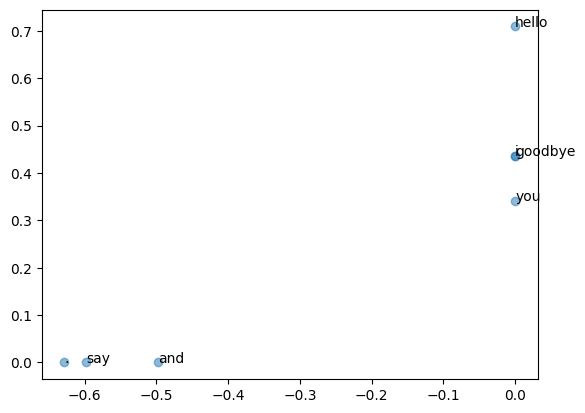

In [60]:
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:, 0], U[:, 1], alpha=0.5)
plt.show()

In [63]:
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'deeplearning'))
from dataset import ptb
corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기: ', len(corpus))
print('corpus[:30] : ', corpus[:30])
print()
print('id_to_word[0] : ', id_to_word[0])
print('id_to_word[1] : ', id_to_word[1])
print('id_to_word[2] : ', id_to_word[2])
print()
print("word_to_id['car'] : ", word_to_id['car'])
print("word_to_id['happy'] : ", word_to_id['happy'])
print("word_to_id['lexus'] : ", word_to_id['lexus'])

Done
말뭉치 크기:  929589
corpus[:30] :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0] :  aer
id_to_word[1] :  banknote
id_to_word[2] :  berlitz

word_to_id['car'] :  3856
word_to_id['happy'] :  4428
word_to_id['lexus'] :  7426


In [64]:
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'deeplearning'))
import numpy as np
from common.util import preprocess, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print("동시발생 수 계산 ...")
C = create_co_matrix(corpus, vocab_size, window_size)
print("PPMI 계산 ...")
W = ppmi(C, verbose=True)

print("SVD 계산 ...")
try:
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)
except ImportError:
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

동시발생 수 계산 ...
PPMI 계산 ...
1.00 완료
2.00 완료
3.00 완료
4.00 완료
5.00 완료
6.00 완료
7.00 완료
8.00 완료
9.00 완료
10.00 완료
11.00 완료
12.00 완료
13.00 완료
14.00 완료
15.00 완료
16.00 완료
17.00 완료
18.00 완료
19.00 완료
20.00 완료
21.00 완료
22.00 완료
23.00 완료
24.00 완료
25.00 완료
26.00 완료
27.00 완료
28.00 완료
29.00 완료
30.00 완료
31.00 완료
32.00 완료
33.00 완료
34.00 완료
35.00 완료
36.00 완료
37.00 완료
38.00 완료
39.00 완료
40.00 완료
41.00 완료
42.00 완료
43.00 완료
44.00 완료
45.00 완료
46.00 완료
47.00 완료
48.00 완료
49.00 완료
50.00 완료
51.00 완료
52.00 완료
53.00 완료
54.00 완료
55.00 완료
56.00 완료
57.00 완료
58.00 완료
59.00 완료
60.00 완료
61.00 완료
62.00 완료
63.00 완료
64.00 완료
65.00 완료
66.00 완료
67.00 완료
68.00 완료
69.00 완료
70.00 완료
71.00 완료
72.00 완료
73.00 완료
74.00 완료
75.00 완료
76.00 완료
77.00 완료
78.00 완료
79.00 완료
80.00 완료
81.00 완료
82.00 완료
83.00 완료
84.00 완료
85.00 완료
86.00 완료
87.00 완료
88.00 완료
89.00 완료
90.00 완료
91.00 완료
92.00 완료
93.00 완료
94.00 완료
95.00 완료
96.00 완료
97.00 완료
98.00 완료
99.00 완료
100.00 완료
SVD 계산 ...

[query] you
 i: 0.700317919254303
 we: 0.6367184519767761
 anybody: 0.